## Step 1: install and import the libraries

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/My\ Drive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive


In [ ]:
!pip install gymnasium
import gymnasium as gym
import mo_gymnasium as mo
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.2 MB/s eta 0:00:00


In [ ]:
import sys
!{sys.executable} -m pip install moviepy

## Step 2: create an environment

In [ ]:
#Input is changed here to reduce mistakes
environment = "mo-mountaincar-2Obj" #"mo-mountaincar-velocity"
entry_pt = "mo_gymnasium.envs.mountain_car_2obj.mountain_car_2obj:MOMountainCar" #"mo_gymnasium.envs.mountain_car_velocity.mountain_car_velocity:MOMountainCar"

In [ ]:
#Run twice for registration (No clue why)
gym.envs.register(
    id=environment,
    entry_point=entry_pt,
    max_episode_steps=200,
) #Register the environment before calling
env = mo.make(environment, render_mode="rgb_array")

Box(-1.0, [-1.  0.], (2,), float32)


/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment mo-mountaincar-2Obj already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [ ]:
#Run twice for registration (No clue why)
gym.envs.register(
    id=environment,
    entry_point=entry_pt,
    max_episode_steps=200,
) #Register the environment before calling
env = mo.make(environment, render_mode="rgb_array")

Box(-1.0, [-1.  0.], (2,), float32)


## Step 3: extract environment information

In [ ]:
env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

In [ ]:
env.action_space

Discrete(3)

In [ ]:
env.unwrapped.reward_dim

3

## Step 4: use Gymnasium features in MO-Gymnasium

In [ ]:
from gymnasium.wrappers.record_video import RecordVideo

## Step 5: go through the environment with a random agent

## Step 6: scalarize env and run it with stable-baselines3



In [ ]:
!pip install stable-baselines3 --upgrade

In [ ]:
import stable_baselines3 as sb3
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.monitor import Monitor
import numpy as np
#import mo_gymnasium as mo_gym
import os
import time

In [ ]:
##Evaluating it for the single case:

# env = gym.make('MountainCar-v0', render_mode="rgb_array")
# agent = sb3.DQN(policy="MlpPolicy",
#     env=env,
#     seed=0,
#     learning_rate=0.0001,
#     buffer_size=int(2e5),  # Replay buffer size
#     learning_starts=1000,  # Number of steps before starting training
#     train_freq=4,          # Number of actions between updates
#     gradient_steps=1,      # Number of optimization steps per batch
#     target_update_interval=1000,  # Frequency (in steps) to update the target network
#     exploration_fraction=1,     # Fraction of the total training steps for exploration
#     exploration_final_eps=0,   # Final epsilon value for exploration
#     gamma=0.9,
#     max_grad_norm=5,
#     policy_kwargs=None,
#     verbose=1)

# #Works very well!

# agent.learn(total_timesteps=300000,progress_bar=True)  #Number of episodes?

# #Can save each model I learn and see which one is the best
# #timesteps is 200000
# mean_reward, std_reward = evaluate_policy(agent, agent.get_env(), n_eval_episodes=10) #Originally 10
# print(f"Mean reward: {mean_reward} and Standard Deviation: {std_reward}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Output()

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4973     |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
----------------------------------


KeyboardInterrupt: ignored

In [ ]:
###For a total reward
# class SaveOnBestTrainingRewardCallback(BaseCallback):
#     """
#     Callback for saving a model (the check is done every ``check_freq`` steps)
#     based on the training reward (in practice, we recommend using ``EvalCallback``).

#     :param check_freq: (int)
#     :param log_dir: (str) Path to the folder where the model will be saved.
#       It must contains the file created by the ``Monitor`` wrapper.
#     :param verbose: (int)
#     """
#     def __init__(self, check_freq: int, log_dir: str, verbose=1):
#         super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
#         self.check_freq = check_freq
#         self.log_dir = log_dir
#         self.save_path = os.path.join(log_dir, 'best_model')
#         self.best_mean_reward = -np.inf

#     def _init_callback(self) -> None:
#         # Create folder if needed
#         if self.save_path is not None:
#             os.makedirs(self.save_path, exist_ok=True)

#     def _on_step(self) -> bool:
#         if self.n_calls % self.check_freq == 0:

#           # Retrieve training reward
#           x, y = ts2xy(load_results(self.log_dir), 'timesteps')
#           if len(x) > 0:
#               # Mean training reward over the last 100 episodes
#               mean_reward = np.mean(y[-100:])
#               if self.verbose > 0:
#                 print("Num timesteps: {}".format(self.num_timesteps))
#                 print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

#               # New best model, you could save the agent here
#               if mean_reward > self.best_mean_reward:
#                   self.best_mean_reward = mean_reward
#                   # Example for saving best model
#                   if self.verbose > 0:
#                     print("Saving new best model to {}".format(self.save_path))
#                   self.model.save(self.save_path)

#         return True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
###For the reward for each objective
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contain the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, reward_dim: int, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_rewards = {0: -np.inf, 1: -np.inf}  # Assuming -1 and 0 are the indices for objectives
        self.objective_indices = [0, 1]  # Objective indices
        self.reward_dim = reward_dim
        self.episode_sum = [0]*self.reward_dim

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.training_env.buf_dones[0]:
          training_values.append((self.episode_sum,self.training_env.buf_infos[0].get("TimeLimit.truncated"))) #Change the code
          self.episode_sum = [0]*self.reward_dim
        else:
          self.episode_sum += self.training_env.buf_infos[0].get("vector_reward")
        return True




In [ ]:

# Linear scalarizes the environment
training_values=[]
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
scalar_weight=np.array([0.95, 0.05])
steps = 200000
env = mo.LinearReward(mo.make(environment, render_mode="rgb_array"), weight=scalar_weight) #Since 2nd objective is positive, will give it same weightage
env = Monitor(env, log_dir)
#env = mo.LinearReward(mo.make("mo-mountaincar-velocity", render_mode="rgb_array"), weight=np.array([0.9, 0.1]))

values = []

print("Action space:", env.action_space)
# for action_index in range(env.action_space.n):
#         print(f"Action index {action_index} corresponds to action: {env.unwrapped.get_action_meanings()[action_index]}")4

agent = sb3.DQN(policy="MlpPolicy",
    env=env,
    seed=0,
    learning_rate=0.0001, #Originally, 0.0001
    buffer_size=int(2e4),  # Replay buffer size
    learning_starts=1000,  # Number of steps before starting training
    train_freq=4,          # Number of actions between updates
    gradient_steps=1,      # Number of optimization steps per batch
    target_update_interval=1000,  # Frequency (in steps) to update the target network
    exploration_fraction=1,     # Fraction of the total training steps for exploration
    exploration_final_eps=0,   # Final epsilon value for exploration
    gamma=0.9,
    max_grad_norm=5,
    policy_kwargs=None,
    verbose=1)
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir, reward_dim=env.unwrapped.reward_dim)
agent.learn(total_timesteps=steps, callback=callback) #, callback=callback #200000
#,progress_bar=True , callback=callback

agent.save(f"DQN-{environment}-{scalar_weight}-{steps}")

#Can save each model I learn and see which one is the best
#timesteps is 200000
mean_reward, std_reward = evaluate_policy(agent, agent.get_env(), n_eval_episodes=10) #Originally 10
print(f"Mean reward: {mean_reward} and Standard Deviation: {std_reward}")

Box(-1.0, [-1.  0.], (2,), float32)
Action space: Discrete(3)
Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -197     |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4851     |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
----------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -197     |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1955     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1600     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.2      |
|    n_updates        | 149      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -197     |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 1879     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2400     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0933   |
|    n_updates      

In [ ]:
training_values_1=[]
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
scalar_weight=np.array([0.05,0.95])
steps = 400000
env = mo.LinearReward(mo.make(environment, render_mode="rgb_array"), weight=scalar_weight) #Since 2nd objective is positive, will give it same weightage
env = Monitor(env, log_dir)
#env = mo.LinearReward(mo.make("mo-mountaincar-velocity", render_mode="rgb_array"), weight=np.array([0.9, 0.1]))

values_1 = []

print("Action space:", env.action_space)
# for action_index in range(env.action_space.n):
#         print(f"Action index {action_index} corresponds to action: {env.unwrapped.get_action_meanings()[action_index]}")4

agent = sb3.A2C(policy="MlpPolicy",
            env=env,
            seed=0,
            learning_rate=0.0001,
            gamma=0.9,
            gae_lambda=1.0,  # Set to 1.0 for no advantage estimation (just discounted reward)
            max_grad_norm=5,
            verbose=1)
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir, reward_dim=env.unwrapped.reward_dim)
agent.learn(total_timesteps=steps, callback=callback) #, callback=callback #200000
#,progress_bar=True , callback=callback

#Can save each model I learn and see which one is the best
#timesteps is 200000
agent.save(f"A2C-{environment}-{scalar_weight}-{steps}")
mean_reward, std_reward = evaluate_policy(agent, agent.get_env(), n_eval_episodes=10) #Originally 10
print(f"Mean reward: {mean_reward} and Standard Deviation: {std_reward}")

Streaming output truncated to the last 5000 lines.
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | 13.9     |
| time/                 |          |
|    fps                | 406      |
|    iterations         | 50700    |
|    time_elapsed       | 624      |
|    total_timesteps    | 253500   |
| train/                |          |
|    entropy_loss       | -0.0231  |
|    explained_variance | 0.219    |
|    learning_rate      | 0.0001   |
|    n_updates          | 50699    |
|    policy_loss        | 0.000577 |
|    value_loss         | 0.0375   |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | 13.6      |
| time/                 |           |
|    fps                | 406       |
|    iterations         | 50800     |
|    time_elapse

In [ ]:
print(training_values_1)

[]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv

trajs=[]
objective_values = []
def record_video(env_id, model, video_length=500, prefix="", video_folder="videos/"):
    """
    :param env_id: (str)
    :param model: (RL model)
    :param video_length: (int)
    :param prefix: (str)
    :param video_folder: (str)
    """
    eval_env = DummyVecEnv([lambda: mo.make(env_id, render_mode="rgb_array")])
    #print(eval_env)
    # Start the video at step=0 and record 500 steps
    eval_env = VecVideoRecorder(
        model.get_env(),
        video_folder=video_folder,
        record_video_trigger=lambda step: step == 0,
        video_length=video_length,
        name_prefix=prefix,
    )
    obs_arr = []
    objective_values = []
    obs = eval_env.reset()
    obs_arr.append(obs)
    steps = 0
    for i in range(video_length):
        action, _states = agent.predict(obs, deterministic=True)
        #print(action)
        obs, rewards, done, info = eval_env.step(action) #Why is this not terminated, truncated? -- Stable baseline
        objective_values.append(info[0].get("vector_reward"))
        steps += 1
        #total += rewards
        obs1 = np.append(obs, [action])
        obs_arr.append(obs1)
        #print(obs1)
        if (done):
          obs = eval_env.reset()
          obs_arr = []
          obs_arr.append(obs)
          trajs.append(obs_arr)
          print("Steps =", steps)

    # Close the video recorder
    eval_env.close()

ValueError: x and y must be the same size

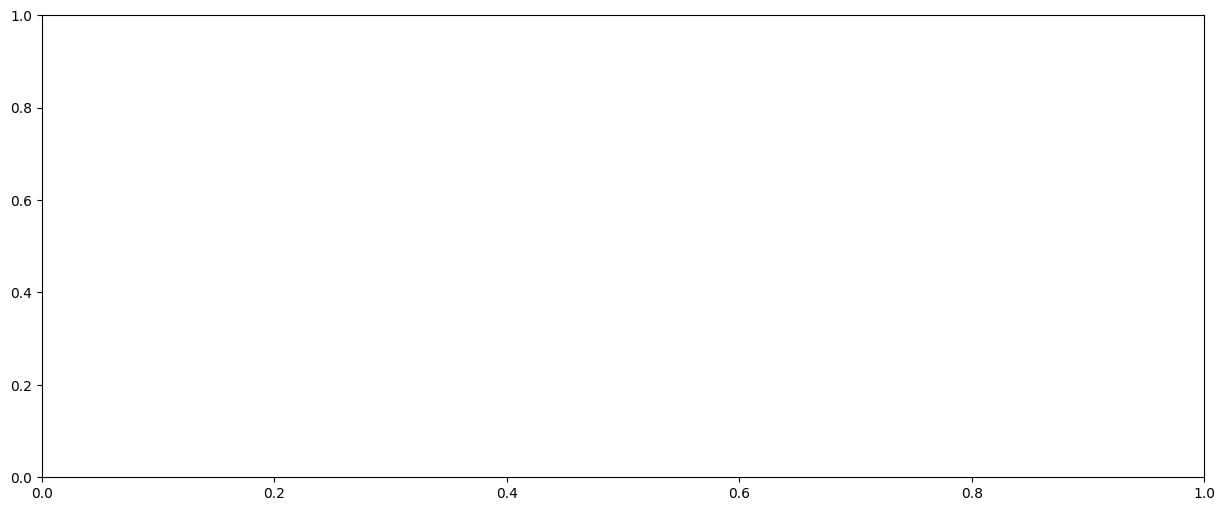

In [ ]:
#For velocity v
x_arr=[]
y_arr=[]
#print(objective_values)
plt.figure(figsize=(15, 6))
for [x,y] in training_values[1:-1]:
  x_arr.append(x)
  y_arr.append(y)

# Plotting the coordinates
plt.scatter(range(len(x_arr)),x_arr,c="blue", marker='o',s=15, label="Movement")
plt.scatter(range(len(y_arr)),y_arr, c="green", marker='o',s=15, label="Speed")
plt.legend()
#plt.ylim(-1.1,1.1)
#plt.xlim(0, 2000)


# Set axis labels and title
plt.xlabel('Episode')
plt.ylabel('Objective Value')
#plt.xlim(-1, 1)
# plt.title('MO
#Mountain Car Scalarized')

# Display the plot
#plt.show()
plt.grid()
plt.savefig("Training {} - {}.jpg".format(scalar_weight,steps), dpi=300)

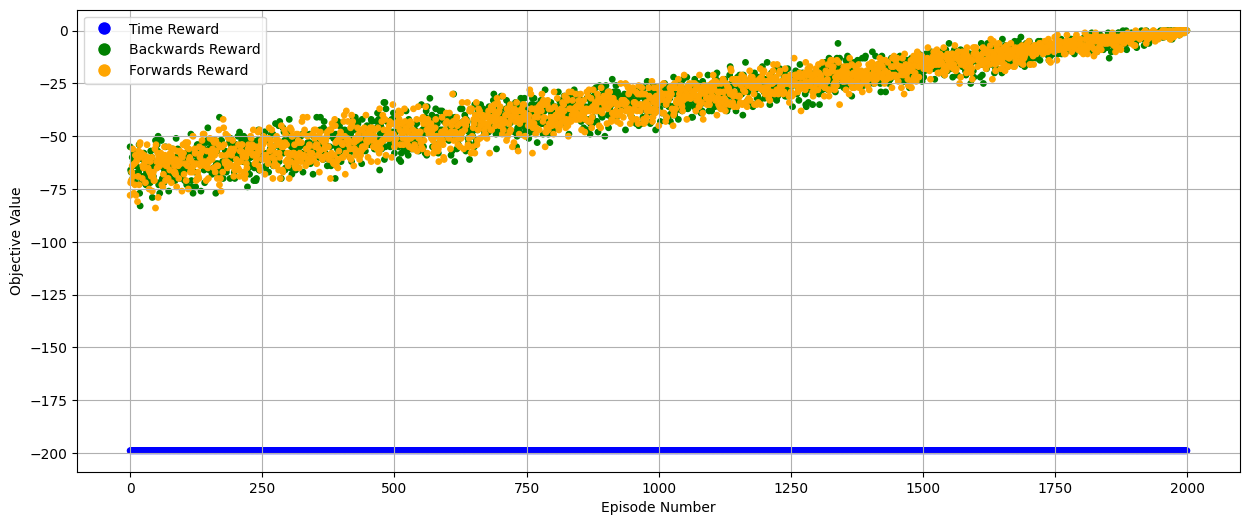

In [ ]:
# Assuming training_values is a list of [x, y, goal_reached] triples

x_arr = np.array([entry[0][0] for entry in training_values])
y_arr = np.array([entry[0][1] for entry in training_values])
z_arr = np.array([entry[0][2] for entry in training_values])
goal_reached = np.array([entry[1] for entry in training_values])

# Define colors based on goal reached or not

plt.figure(figsize=(15, 6))


colors_1 = np.where(goal_reached, 'blue', 'blue')
colors_2 = np.where(goal_reached, 'green', 'green')
colors_3 = np.where(goal_reached, 'orange', 'orange')

# Scatter plot with different colors based on goal reached or not
plt.scatter(range(len(x_arr)), x_arr, marker='o', s=15, c=colors_1, label="Time")
plt.scatter(range(len(y_arr)), y_arr, marker='o', s=15, c=colors_2, label="Movement")
plt.scatter(range(len(z_arr)), z_arr, marker='o', s=15, c=colors_3, label="Speed")


#legend_labels = ['Time Reward (Reached)', 'Time Reward(Not Reached)', 'Movement(Reached)','Movement (Not Reached)' ,'Speed Reward(Reached)', 'Speed Reward(Not Reached)']
legend_labels = ['Time Reward','Backwards Reward','Forwards Reward']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10),
                  ]

plt.legend(legend_handles, legend_labels)

plt.xlabel('Episode Number')
plt.ylabel('Objective Value')
plt.grid()
plt.savefig("Training {} - {}.jpg".format(scalar_weight, steps), dpi=300)
plt.show()

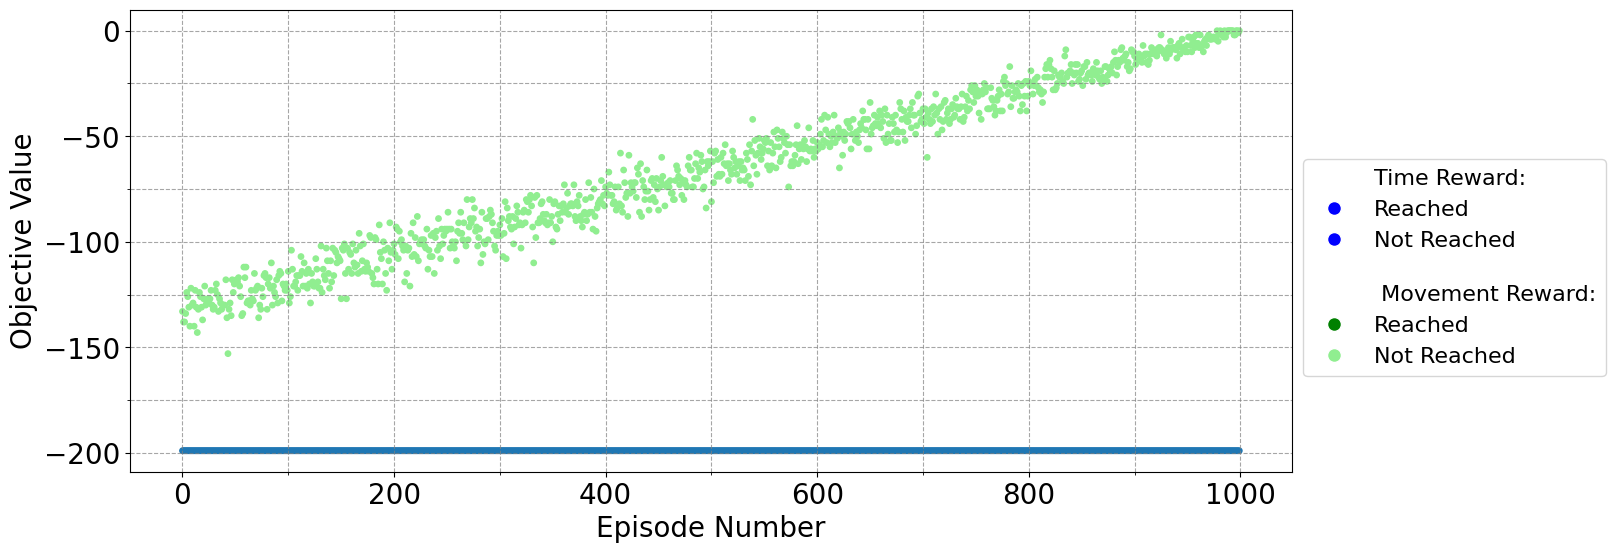

In [ ]:
# Assuming training_values is a list of [x, y, goal_reached] triples

x_arr = np.array([entry[0][0] for entry in training_values])
y_arr = np.array([entry[0][1] for entry in training_values])
# z_arr = np.array([entry[0][2] for entry in training_values])
goal_reached = np.array([entry[1] for entry in training_values])

# Define colors based on goal reached or not

plt.figure(figsize=(15, 6))


colors_1 = np.where(goal_reached, '#1f77b4', 'blue')
colors_2 = np.where(goal_reached, 'lightgreen', 'green')
colors_3 = np.where(goal_reached, '#FFD580', 'orange')

# Scatter plot with different colors based on goal reached or not
plt.plot([],[],linestyle='none',label='Time Reward:', color="None")
plt.scatter(range(len(x_arr)), x_arr, marker='o', s=15, c=colors_1, label="Time")
plt.scatter(range(len(y_arr)), y_arr, marker='o', s=15, c=colors_2, label="Movement")
# plt.scatter(range(len(z_arr)), z_arr, marker='o', s=15, c=colors_3, label="Speed")


legend_labels = ["Time Reward:",'Reached','Not Reached' ,"\n Movement Reward:",'Reached','Not Reached'] #, "\n Forwards Reward:", 'Reached', 'Not Reached']
# # 'Time Reward (Reached)', 'Time Reward(Not Reached)',
# legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
#                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1f77b4', markersize=10),
#                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10),
#                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=10),
#                   # plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10),
#                   # plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FFD580', markersize=10),
#                   ]
# legend_handles = [
#     plt.Line2D([0], [0], linestyle='none', marker='None', color='w', label='Movement Reward:'),
#     plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='blue', markersize=10),
#     plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='#1f77b4', markersize=10),
#     plt.Line2D([0], [0], linestyle='none', marker='None', color='w', label='Time Reward:'),
#     plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='green', markersize=10),
#     plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='lightgreen', markersize=10),
#     plt.Line2D([0], [0], linestyle='none', marker='None', color='w', label='Speed Reward:'),
#     plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='orange', markersize=10),
#     plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='#FFD580', markersize=10),
# ]

legend_handles = [
    plt.Line2D([0], [0], linestyle='none', marker='None', color='w', label='Movement Reward:'),
    plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], linestyle='none', marker='None', color='w', label='Time Reward:'),
    plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='lightgreen', markersize=10),
    # plt.Line2D([0], [0], linestyle='none', marker='None', color='w', label='Speed Reward:'),
    # plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='orange', markersize=10),
    # plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='#FFD580', markersize=10),
]

plt.legend(legend_handles, legend_labels,bbox_to_anchor=(1, 0.7), loc='upper left', fontsize=16, frameon = True) #bbox_to_anchor=(1, 1), loc='upper left',  borderpad = 0

plt.xlabel('Episode Number', fontsize=20)
plt.ylabel('Objective Value', fontsize=20)
plt.gca().tick_params(axis='both', which='major', labelsize=20)
plt.gca().tick_params(axis='both', which='minor', labelsize=16)
plt.grid(which="major", color="gray", linestyle='--',  alpha=0.7)
plt.grid(which="minor", color="gray", linestyle='--',  alpha=0.7)
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(100))  # Set minor ticks for x-axis
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(25))
plt.savefig("Training {} - {}.jpg".format(scalar_weight, steps), dpi=300, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: x and y must be the same size

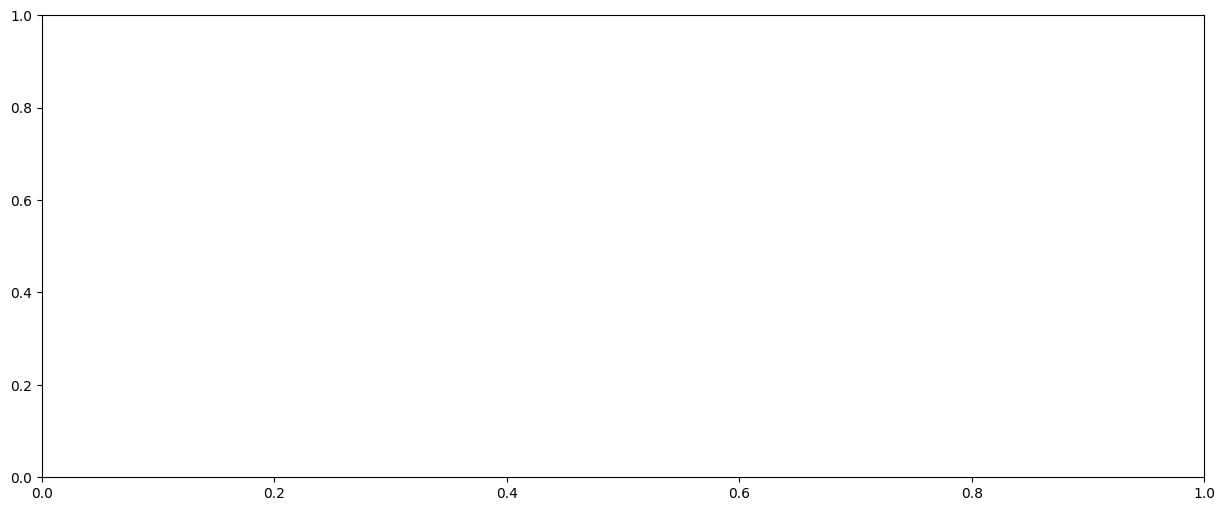

In [ ]:
x_arr=[]
y_arr=[]
#print(objective_values)
plt.figure(figsize=(15, 6))
for [x,y] in training_values[:-1]:
  x_arr.append(x)
  y_arr.append(y)
plt.scatter(y_arr,x_arr, marker='o',s=15)
plt.xlabel('Speed')
plt.ylabel('Time')
plt.savefig("Correlation {} - {}.jpg".format(scalar_weight,steps), dpi=300)
plt.grid()

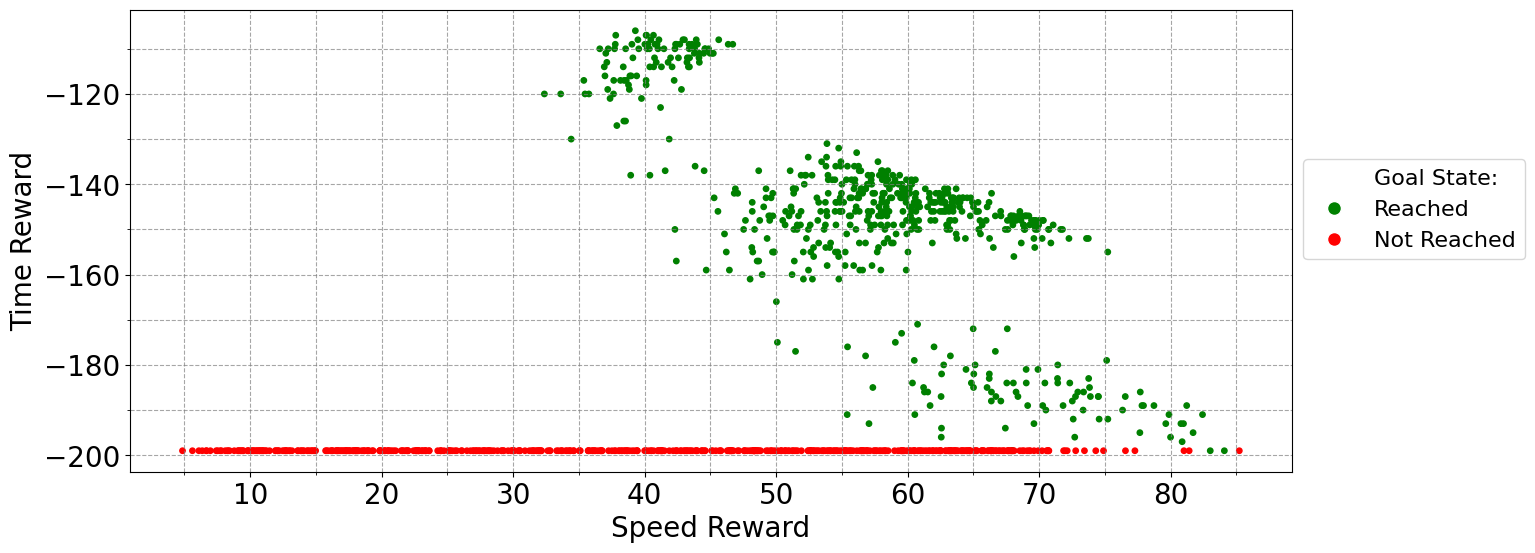

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming training_values is a list of [x, y, goal_reached] triples

x_arr = np.array([entry[0][0] for entry in training_values])
y_arr = np.array([entry[0][1] for entry in training_values])
goal_reached = np.array([entry[1] for entry in training_values])

# Define colors based on goal reached or not
colors = np.where(goal_reached, 'red', 'green')

plt.figure(figsize=(15, 6))

# Scatter plot with different colors based on goal reached or not
plt.plot([],[],linestyle='none',label='Goal State:', color="None")
plt.scatter(y_arr, x_arr, marker='o', s=15, c=colors)
legend_labels = ["Goal State:", 'Reached', 'Not Reached']
legend_handles = [
    plt.Line2D([0], [0], linestyle='none', marker='None', color='w', label='Goal State:'),
    plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], linestyle='none', marker='o', color='w', markerfacecolor='red', markersize=10)]

plt.legend(legend_handles, legend_labels,bbox_to_anchor=(1, 0.7), loc='upper left', fontsize=16, frameon = True)
plt.xlabel('Speed Reward', fontsize=20)
plt.ylabel('Time Reward', fontsize=20)
plt.grid(which="major", color="gray", linestyle='--', alpha=0.7)
plt.grid(which="minor", color="gray", linestyle='--', alpha=0.7)
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(5))  # Set minor ticks for x-axis
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.gca().tick_params(axis='both', which='major', labelsize=20)
plt.gca().tick_params(axis='both', which='minor', labelsize=16)
plt.savefig("Correlation {} - {}.jpg".format(scalar_weight, steps), dpi=300,  bbox_inches='tight')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

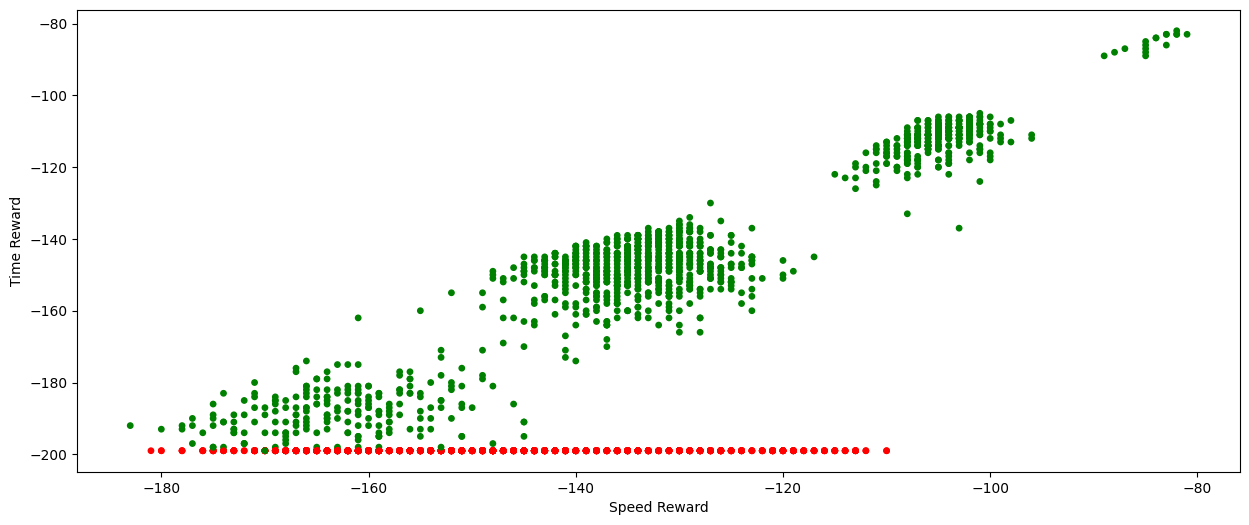

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming training_values is a list of [x, y, goal_reached] triples

x_arr = np.array([entry[0][0] for entry in training_values])
y_arr = np.array([entry[0][1] for entry in training_values])
z_arr = np.array([entry[0][2] for entry in training_values])
goal_reached = np.array([entry[1] for entry in training_values])

# Define colors based on goal reached or not
colors = np.where(goal_reached, 'red', 'green')

plt.figure(figsize=(15, 6))

# Scatter plot with different colors based on goal reached or not
plt.scatter(y_arr, x_arr, marker='o', s=15, c=colors)

plt.xlabel('Speed Reward')
plt.ylabel('Time Reward')
plt.zlabel('Movement Reward')
plt.grid()
plt.savefig("Correlation {} - {}.jpg".format(scalar_weight, steps), dpi=300)
plt.show()


In [ ]:
#For the 3 objectives case
x_arr=[]
y_arr=[]
z_arr=[]
#print(objective_values)
plt.figure(figsize=(15, 6))
for [x,y,z] in training_values[:-1]:
  x_arr.append(x)
  y_arr.append(y)
  z_arr.append(z)

# Plotting the coordinates
plt.scatter(range(len(x_arr)),x_arr,c="blue", marker='o',s=15, label="Time")
plt.scatter(range(len(y_arr)),y_arr, c="green", marker='o',s=15, label="Movement")
plt.scatter(range(len(z_arr)),z_arr, c="orange", marker='o',s=15, label="Velocity")
plt.legend()
#plt.ylim(-1.1,1.1)
#plt.xlim(0, 2000)


# Set axis labels and title
plt.xlabel('Episode')
plt.ylabel('Objective Value')
#plt.xlim(-1, 1)
# plt.title('MO Mountain Car Scalarized')

# Display the plot
plt.show()

ValueError: not enough values to unpack (expected 3, got 2)

<Figure size 1500x600 with 0 Axes>

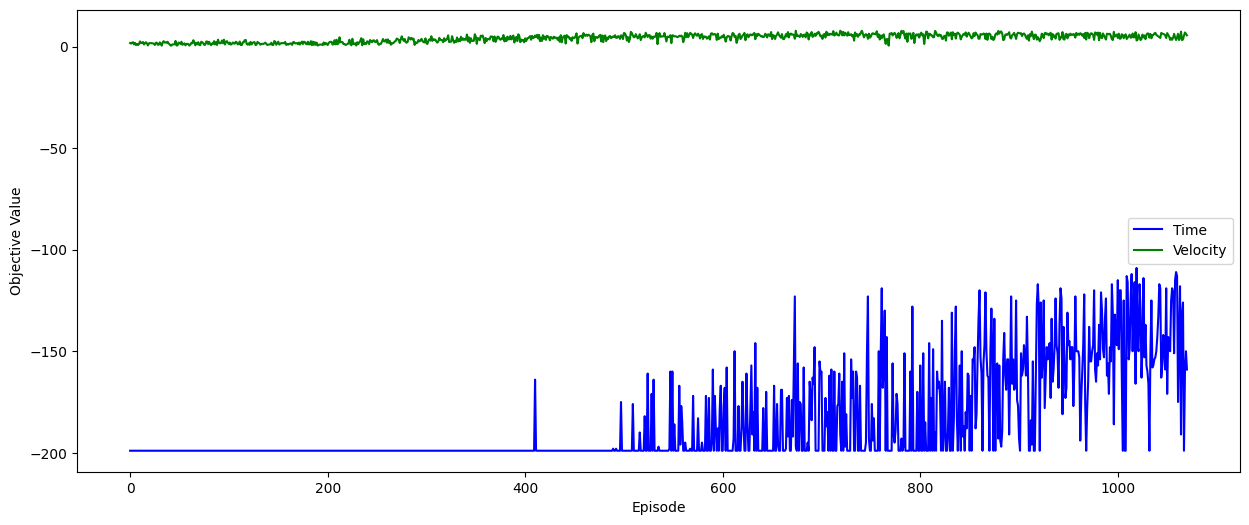

In [ ]:
#For velocity v
#print(training_values)
x_arr=[]
y_arr=[]
#print(objective_values)
plt.figure(figsize=(15, 6))
for [x,y] in training_values[:-1]:
  x_arr.append(x)
  y_arr.append(y)

# Plotting the coordinates
plt.plot(range(len(x_arr)),x_arr,c="blue", label="Time")
plt.plot(range(len(y_arr)),y_arr, c="green", label="Velocity")
plt.legend()
#plt.ylim(-1.1,1.1)
#plt.xlim(0, 2000)


# Set axis labels and title
plt.xlabel('Episode')
plt.ylabel('Objective Value')
#plt.xlim(-1, 1)
# plt.title('MO Mountain Car Scalarized')

# Display the plot
plt.show()

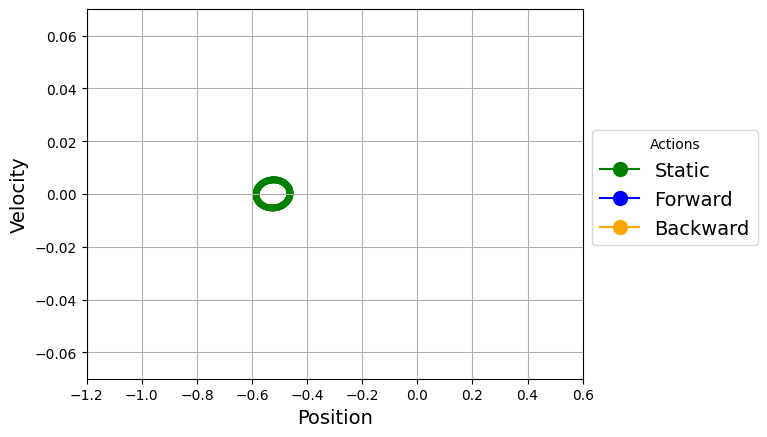

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming you have a v_arr containing values 0, 1, 2 corresponding to each (x, y) point
v_arr = []
x_arr = []
y_arr = []

for [x, y, z] in trajs[0][1:-1]:
    x_arr.append(x)
    y_arr.append(y)
    v_arr.append(z)

# Linking actions to labels and colors
action_mapping = {
    1: {'label': 'Static', 'color': 'green', 'order': 1},
    0: {'label': 'Backward', 'color': 'orange', 'order': 2},
    2: {'label': 'Forward', 'color': 'blue', 'order': 3}
}

# Create a set of unique action-color-order tuples
desired_order = ['Static', 'Forward', 'Backward']

# Create a list of legend handles in the desired order
legend_handles = [
    Line2D([0], [0], marker='o', color=entry['color'], markerfacecolor=entry['color'], markersize=10, label=entry['label'])
    for label in desired_order
    for _, entry in action_mapping.items() if entry['label'] == label
]

# Plotting the coordinates with RGB colors based on action_mapping
scatter = plt.scatter(x_arr, y_arr, c=[action_mapping[action]['color'] for action in v_arr], marker='o', s=15)

# Create a legend
plt.legend(handles=legend_handles,bbox_to_anchor=(1, 0.7), loc='upper left', fontsize=14, title='Actions')

# Set axis labels and title
plt.xlabel('Position', fontsize=14)
plt.ylabel('Velocity', fontsize=14)

plt.xlim([-1.2, 0.6])
plt.ylim([-0.07, 0.07])

plt.grid()
plt.savefig(f"Trajectory {scalar_weight}-{steps}.jpg", dpi=300,  bbox_inches='tight')
# Display the plot
plt.show()



[array([[-0.5463648,  0.       ]], dtype=float32), array([[-0.5471942 , -0.00082939]], dtype=float32), array([[-0.5488468 , -0.00165257]], dtype=float32), array([[-0.5513101 , -0.00246339]], dtype=float32), array([[-0.55456597, -0.00325579]], dtype=float32), array([[-0.5585898 , -0.00402388]], dtype=float32), array([[-0.56335175, -0.00476192]], dtype=float32), array([[-0.56881624, -0.00546448]], dtype=float32), array([[-0.5749426 , -0.00612639]], dtype=float32), array([[-0.5816854 , -0.00674283]], dtype=float32), array([[-0.58899486, -0.00730939]], dtype=float32), array([[-0.5968169 , -0.00782206]], dtype=float32), array([[-0.6050942 , -0.00827732]], dtype=float32), array([[-0.6137664 , -0.00867218]], dtype=float32), array([[-0.62277055, -0.00900414]], dtype=float32), array([[-0.6320418 , -0.00927128]], dtype=float32), array([[-0.641514  , -0.00947222]], dtype=float32), array([[-0.65112025, -0.00960619]], dtype=float32), array([[-0.6607931 , -0.00967294]], dtype=float32), array([[-0.67

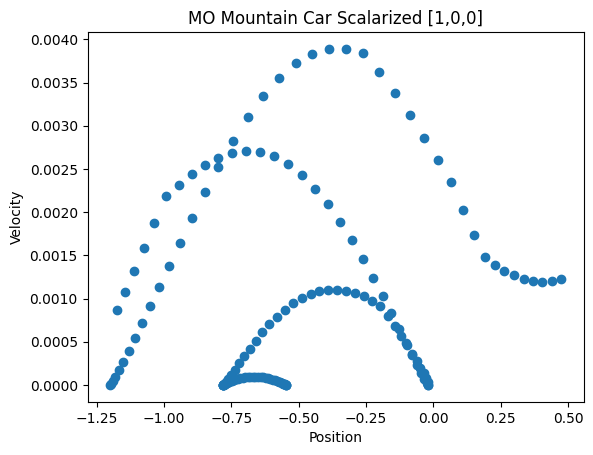

In [ ]:
#For velocity v^2
x_arr=[]
y_arr=[]
print(obs_arr)

for [[x,y]] in obs_arr[:-1]:
  x_arr.append(x)
  y_arr.append(y**2)

# Plotting the coordinates
plt.scatter(x_arr, y_arr, marker='o')

# Set axis labels and title
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('MO Mountain Car Scalarized [1,0,0]')

# Display the plot
plt.show()

[]
Moviepy - Building video /content/dissertation/videos/-step-0-to-step-1000.mp4.
Moviepy - Writing video /content/dissertation/videos/-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/dissertation/videos/-step-0-to-step-1000.mp4


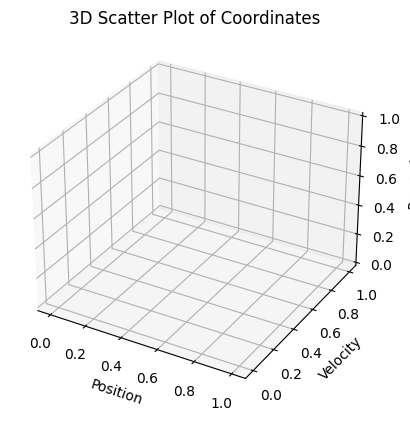

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_arr = []
y_arr = []
z_arr = []

# Assuming obs_arr is a list of lists with [[x, y, z]] format
print(obs_arr)
for [x, y, z] in obs_arr[1:-1]:
    x_arr.append(x)
    y_arr.append(y)
    z_arr.append(z)

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_arr, y_arr, z_arr, marker='o')

# Set axis labels and title
ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_zlabel('Reward')
ax.set_title('3D Scatter Plot of Coordinates')

# Display the plot
plt.show()

In [ ]:
record_video(environment, agent, video_length=1000)
#record_video("mo-mountaincar-v0", agent, video_length=1000)
#record_video("mo-mountaincar-velocity", agent, video_length=1000)
#record_video("MountainCar-v0", agent, video_length=1000)
#record_video("MountainCarContinuous-v0", agent, video_length=1000)

Moviepy - Building video /content/dissertation/videos/-step-0-to-step-1000.mp4.
Moviepy - Writing video /content/dissertation/videos/-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/dissertation/videos/-step-0-to-step-1000.mp4
Steps = 200
Moviepy - Building video /content/dissertation/videos/-step-200-to-step-1200.mp4.
Moviepy - Writing video /content/dissertation/videos/-step-200-to-step-1200.mp4



Moviepy - Done !
Moviepy - video ready /content/dissertation/videos/-step-200-to-step-1200.mp4
Steps = 400
Moviepy - Building video /content/dissertation/videos/-step-400-to-step-1400.mp4.
Moviepy - Writing video /content/dissertation/videos/-step-400-to-step-1400.mp4



Moviepy - Done !
Moviepy - video ready /content/dissertation/videos/-step-400-to-step-1400.mp4
Steps = 600
Moviepy - Building video /content/dissertation/videos/-step-600-to-step-1600.mp4.
Moviepy - Writing video /content/dissertation/videos/-step-600-to-step-1600.mp4



Moviepy - Done !
Moviepy - video ready /content/dissertation/videos/-step-600-to-step-1600.mp4
Steps = 800
Moviepy - Building video /content/dissertation/videos/-step-800-to-step-1800.mp4.
Moviepy - Writing video /content/dissertation/videos/-step-800-to-step-1800.mp4



Moviepy - Done !
Moviepy - video ready /content/dissertation/videos/-step-800-to-step-1800.mp4
Steps = 1000
Moviepy - Building video /content/dissertation/videos/-step-1000-to-step-2000.mp4.
Moviepy - Writing video /content/dissertation/videos/-step-1000-to-step-2000.mp4



Moviepy - Done !
Moviepy - video ready /content/dissertation/videos/-step-1000-to-step-2000.mp4


In [ ]:
len(trajs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7

In [ ]:
#To display the video
from IPython.display import HTML
from base64 import b64encode
mp4 = open('videos/-step-0-to-step-1000.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
import os
dir = "/dissertation/models/"
os.makedirs(dir, exist_ok=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def evaluate(agent):
    #eval_env = mo.LinearReward(mo.make(environment, render_mode="rgb_array"), weight=np.array([x, (1-x)]))
    #eval_env = mo.make(environment, render_mode="rgb_array")
    total_evaluation = [0,0]
    for k in range(100):
      eval_env = agent.get_env()
      obs = eval_env.reset()
      for j in range(200):
          action, _states = agent.predict(obs)
          obs, rewards, done, info = eval_env.step(action) #Why is this not terminated, truncated? -- Stable baseline
          total_evaluation+=(info[0].get("vector_reward"))
          #total += rewards
            #print(obs1)
          if (done):
            break
    total_evaluation = total_evaluation/100
    print(total_evaluation)
    return total_evaluation


In [ ]:
#Trying to generate Pareto Front
import numpy as np
results1 = []
sd = []

###TODO: Introduce model saving

def ParetoGeneration():
  first =np.linspace(0.11, 0.2, num=10)
  #np.linspace has precison issues
    # Linear scalarizes the environment
  for x in first:
    #env = mo.LinearReward(mo.make("mo-mountaincar-velocity-move", render_mode="rgb_array"), weight=np.array([x, (1-x)]))
    print("Objective 1 weight: {} and Objective 2 weight: {}".format(x, (1-x)))
    env = mo.LinearReward(mo.make(environment, render_mode="rgb_array"), weight=np.array([x, (1-x)]))

    print("Action space:", env.action_space)

    agent = sb3.DQN(policy="MlpPolicy",
        env=env,
        seed=0,
        learning_rate=0.0001, #Originally, 0.0001
        buffer_size=int(2e5),  # Replay buffer size
        learning_starts=1000,  # Number of steps before starting training
        train_freq=4,          # Number of actions between updates
        gradient_steps=1,      # Number of optimization steps per batch
        target_update_interval=1000,  # Frequency (in steps) to update the target network
        exploration_fraction=1,     # Fraction of the total training steps for exploration
        exploration_final_eps=0,   # Final epsilon value for exploration
        gamma=0.9,
        max_grad_norm=5,
        policy_kwargs=None,
      verbose=0)

    agent.learn(total_timesteps=400000)

    agent.save(f"models/({x},{(1-x)})")

    #Introduce Model Saving
    answer = evaluate(agent)
    results1.append([x,1-x,answer])
    print((x*answer[0])+((1-x)*answer[1]))
    _, standard_dev = evaluate_policy(agent, agent.get_env(), n_eval_episodes=100)
    sd.append([x,1-x,standard_dev])
    #print(f"Mean reward: {mean_reward} and Standard Deviation: {std_reward}")

ParetoGeneration()


Objective 1 weight: 0.11 and Objective 2 weight: 0.89
Box([-1.  0.], [0.  1.1], (2,), float32)
Action space: Discrete(3)
[0.         8.26116367]
7.3524356638741715
Objective 1 weight: 0.12 and Objective 2 weight: 0.88
Box([-1.  0.], [0.  1.1], (2,), float32)
Action space: Discrete(3)
[0.         8.26116367]
7.269824027201428
Objective 1 weight: 0.13 and Objective 2 weight: 0.87
Box([-1.  0.], [0.  1.1], (2,), float32)
Action space: Discrete(3)
[0.         8.26116367]
7.187212390528684
Objective 1 weight: 0.14 and Objective 2 weight: 0.86
Box([-1.  0.], [0.  1.1], (2,), float32)
Action space: Discrete(3)
[0.         8.26116367]
7.10460075385594
Objective 1 weight: 0.15000000000000002 and Objective 2 weight: 0.85
Box([-1.  0.], [0.  1.1], (2,), float32)
Action space: Discrete(3)
[0.         8.26116367]
7.021989117183197
Objective 1 weight: 0.16 and Objective 2 weight: 0.84
Box([-1.  0.], [0.  1.1], (2,), float32)
Action space: Discrete(3)


KeyboardInterrupt: 

In [ ]:
print(results1)

[[0.0, 1.0, array([-129.33      ,    5.67874955])], [0.1, 0.9, array([-113.98      ,    4.49195537])], [0.2, 0.8, array([-148.94      ,    4.21233408])], [0.30000000000000004, 0.7, array([-178.63      ,    6.20810296])], [0.4, 0.6, array([-132.44      ,    4.81516047])], [0.5, 0.5, array([-146.9       ,    5.07740701])], [0.6000000000000001, 0.3999999999999999, array([-153.7       ,    2.91725097])], [0.7000000000000001, 0.29999999999999993, array([-168.13      ,    5.57978616])], [0.8, 0.19999999999999996, array([-200.        ,    2.08006077])], [0.9, 0.09999999999999998, array([-171.38      ,    2.68572028])], [1.0, 0.0, array([-178.1       ,    5.87531239])]]


In [ ]:
results1= [[   0.  ,    1.  , [-123.49,   52.62]],
       [   0.1 ,    0.9 , [-130.25,   57.23]],
       [   0.2 ,    0.8 , [-118.45,   49.33]],
       [   0.3 ,    0.7 , [-119.3 ,   49.42]],
       [   0.4 ,    0.6 , [-115.13,   41.49]],
       [   0.5 ,    0.5 , [-134.17,   54.78]],
       [   0.6 ,    0.4 , [-139.56,   39.46]],
       [   0.7 ,    0.3 , [-111.37,   40.32]],
       [   0.8 ,    0.2 , [-118.42,   43.4 ]],
       [   0.9 ,    0.1 , [-149.19,   44.96]],
       [   1.  ,    0.  , [-178.1 ,   58.75]]]

results1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[0.0, 1.0, [-123.49, 52.62]],
 [0.1, 0.9, [-130.25, 57.23]],
 [0.2, 0.8, [-118.45, 49.33]],
 [0.3, 0.7, [-119.3, 49.42]],
 [0.4, 0.6, [-115.13, 41.49]],
 [0.5, 0.5, [-134.17, 54.78]],
 [0.6, 0.4, [-139.56, 39.46]],
 [0.7, 0.3, [-111.37, 40.32]],
 [0.8, 0.2, [-118.42, 43.4]],
 [0.9, 0.1, [-149.19, 44.96]],
 [1.0, 0.0, [-178.1, 58.75]]]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

result2 = results1
scaler = MinMaxScaler()
#x_arr = [[entry[2][0],entry[2][1]] for entry in result2]  # x-axis corresponds to reward1
x_arr = [[entry[2][0],entry[2][1]] for entry in result2]

# Fit and transform the data
normalized_data = scaler.fit_transform(x_arr)

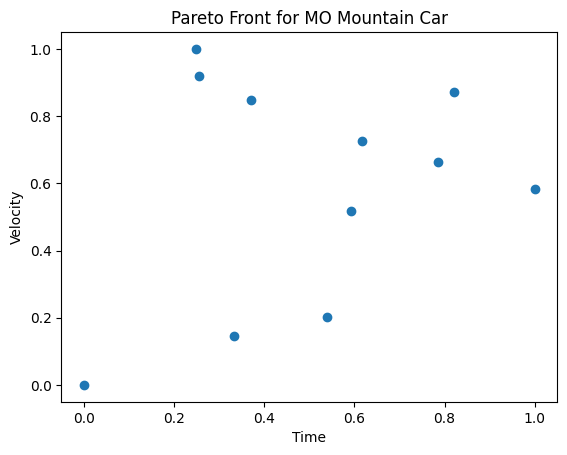

In [ ]:
import matplotlib.pyplot as plt

# result2 = results1 + results
x_values = [normalized_entry[0] for normalized_entry in normalized_data]  # x-axis corresponds to reward1
y_values = [normalized_entry[1] for normalized_entry in normalized_data]  # y-axis corresponds to reward2

# Plotting the scatter plot
plt.scatter(x_values, y_values)

# Set the margin for labels outside the plot
label_margin = 0.02

# Mark each point by (x, y) outside the plot
# for i, entry in enumerate(results):
#     plt.text(entry[2][0] + label_margin, entry[2][1] + label_margin, f'({entry[0]}, {entry[1]})', fontsize=6, ha='center')

# for i, entry in enumerate(results1):
#     plt.text(entry[2][0] + label_margin, entry[2][1] + label_margin, f'({round(entry[0], 1)}, {round(entry[1], 1)})', fontsize=6, ha='center')

# Adding labels and title
plt.xlabel('Movement')
plt.ylabel('Speed')
#plt.title('Pareto Front for MO Mountain Car')

# Display the plot
plt.show()


10
[-136.23, -96.3, -69.58, -35.96] [62.829845635555536, 58.45881807943842, 50.46692094504258, 29.82841101062148]
0.01
0.020000000000000004
0.030000000000000006
0.04000000000000001
0.05000000000000001
0.06000000000000001
0.07
0.08
0.09000000000000001
0.1


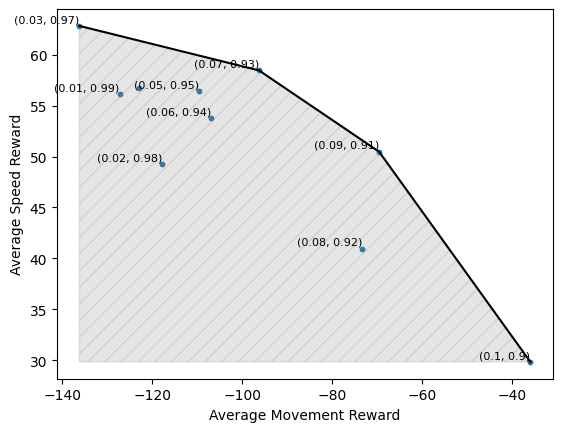

In [ ]:
import matplotlib.pyplot as plt

# result2 = results1 + results
x_values = [entry[2][0] for entry in results1]  # x-axis corresponds to reward1
print(len(x_values))
y_values = [entry[2][1] for entry in results1]  # y-axis corresponds to reward2
#sd_values = [val[2] for val in sd]

# Plotting the scatter plot
#plt.scatter(x_values, y_values, s = sd_values)
plt.scatter(x_values, y_values, s=10)

# Set the margin for labels outside the plot
label_margin = 0.02

# Mark each point by (x, y) outside the plot
# for i, entry in enumerate(results):
#     plt.text(entry[2][0] + label_margin, entry[2][1] + label_margin, f'({entry[0]}, {entry[1]})', fontsize=6, ha='center')

pareto_x = [2,6,8,9]
# pareto_y = []
pareto_front_x = [x_values[i] for i in pareto_x]
pareto_front_y = [y_values[i] for i in pareto_x]
print(pareto_front_x,pareto_front_y)
plt.plot(pareto_front_x, pareto_front_y, 'k-')  # 'k-' means a black solid line
plt.fill_between(pareto_front_x, np.min(y_values),pareto_front_y, color='gray', alpha=0.2, hatch="//")

for i, entry in enumerate(results1):
    print(entry[0])
    if round(entry[0], 2)!= 0.04:
      plt.text(entry[2][0] + label_margin, entry[2][1] + label_margin + 0.15, f'({round(entry[0], 2)}, {round(entry[1], 2)})', fontsize=8, va='bottom', ha='right')


# Adding labels and title
plt.xlabel('Average Movement Reward')
plt.ylabel('Average Speed Reward')
# plt.title('Pareto Front for MO Mountain Car')

#plt.gca().invert_xaxis()
# Display the plot

plt.savefig("Pareto.jpg", dpi=300)
plt.show()



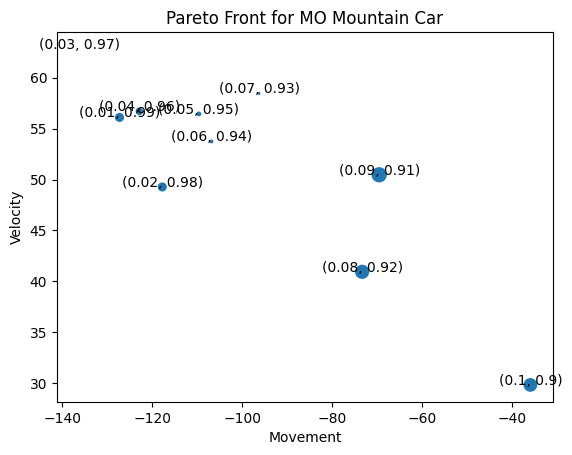

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# result2 = results1 + results
x_values = [entry[2][0] for entry in results1]  # x-axis corresponds to reward1
y_values = [entry[2][1] for entry in results1]  # y-axis corresponds to reward2
sd_values = [val[2] for val in sd]

# Plotting the scatter plot

# Set the margin for labels outside the plot
label_margin = 0.02

# Mark each point by (x, y) outside the plot
# for i, entry in enumerate(results):
#     plt.text(entry[2][0] + label_margin, entry[2][1] + label_margin, f'({entry[0]}, {entry[1]})', fontsize=6, ha='center')
std_devs_normalized = (np.array(sd_values) - np.min(sd_values)) / (np.max(sd_values) - np.min(sd_values))

plt.scatter(x_values, y_values, s = std_devs_normalized*100)

for i, entry in enumerate(results1):
    plt.text(entry[2][0] + label_margin, entry[2][1] + label_margin, f'({round(entry[0], 2)}, {round(entry[1], 2)})', fontsize=10, ha='center')

# Adding labels and title
plt.xlabel('Movement')
plt.ylabel('Velocity')
plt.title('Pareto Front for MO Mountain Car')

# Display the plot
plt.show()
plt.savefig("Movement-Velocity-sd-normalized.jpg", dpi=300)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the standard deviation values for x and y axes
x_sd_values = [sd_x for sd_x in sd_values_x]  # Replace sd_values_x with your actual standard deviation values for x-axis
y_sd_values = [sd_y for sd_y in sd_values_y]  # Replace sd_values_y with your actual standard deviation values for y-axis

# Calculate the average standard deviation
avg_sd = (sum(x_sd_values) + sum(y_sd_values)) / (len(x_sd_values) + len(y_sd_values))

# result2 = results1 + results
x_values = [entry[2][0] for entry in results1]  # x-axis corresponds to reward1
y_values = [entry[2][1] for entry in results1]  # y-axis corresponds to reward2

# Plotting the scatter plot with dot size based on standard deviation
plt.scatter(x_values, y_values, s=[(sd_x + sd_y) / (2 * avg_sd) * 100 for sd_x, sd_y in zip(x_sd_values, y_sd_values)])

# Set the margin for labels outside the plot
label_margin = 0.02

# Mark each point by (x, y) outside the plot
for i, entry in enumerate(results1):
    plt.text(entry[2][0] + label_margin, entry[2][1] + label_margin, f'({round(entry[0], 1)}, {round(entry[1], 1)})', fontsize=6, ha='center')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Pareto Front for MO Mountain Car')

# Display the plot
plt.show()


NameError: name 'sd_values_x' is not defined

In [ ]:
reward_episodes = []
###For the reward for each objective
class EvalCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contain the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, verbose=1):
        super(EvalCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = None
        self.episode_sum = [0,0]
        self.training_values = []

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.training_env.buf_dones[0]:
          self.training_values.append(self.episode_sum)
          self.episode_sum = [0,0]
        else:
          self.episode_sum += self.training_env.buf_infos[0].get("vector_reward")
        return True
    def _on_training_end(self) -> None:
        reward_episodes.append(self.training_values)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!git config --global user.email "praanavgupta@gmail.com"
!git config --global user.name "Pranav Gupta"

In [ ]:
#Push the graphs or models to Github
!git add --all
!git commit -am 'Adding Movement-Speed models'

[main 74f3c81] Adding Movement-Speed models
 12 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 Correlation [0.05 0.95] - 400000.jpg
 create mode 100644 Correlation [0.07 0.93] - 400000.jpg
 create mode 100644 DQN-velocity-move-v2-[0.05 0.95]-400000
 create mode 100644 DQN-velocity-move-v2-[0.07 0.93]-400000
 create mode 100644 Training [0.05 0.95] - 400000.jpg
 create mode 100644 Training [0.07 0.93] - 400000.jpg


In [ ]:
!git push

Enumerating objects: 32, done.
Counting objects: 100% (32/32), done.
Delta compression using up to 2 threads
Compressing objects: 100% (22/22), done.
Writing objects: 100% (22/22), 1.53 MiB | 8.12 MiB/s, done.
Total 22 (delta 7), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (7/7), completed with 6 local objects.
remote: This repository moved. Please use the new location:
remote:   https://github.com/pranavg23/morl-moutain-car.git
To https://github.com/pranavg23/dissertation.git
   7a6572e..74f3c81  main -> main


In [ ]:
!git pull

Already up to date.


In [ ]:
#Load stablebaseline3 model, we need training though!